## Observations and Insights 

In [298]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
combined_df = pd.merge(mouse_df, study_df, on = "Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].value_counts()
mice_count
#249 mice

g989    13
a699    10
g497    10
m650    10
l661    10
        ..
d133     1
v199     1
b447     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Create a clean DataFrame by dropping the duplicate mice by ID and Timepoint. 
clean_df = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df["Mouse ID"].value_counts()
clean_count
#249 mice

a699    10
j984    10
e662    10
a251    10
c832    10
        ..
f932     1
x336     1
o848     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [5]:
drug_list = clean_df["Drug Regimen"].value_counts()
drug_list

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [6]:
#Capomulin stats
cap_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
cap_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [7]:
#Capomulin Tumor volumes
cap_tumor_v = cap_drug_df["Tumor Volume (mm3)"]
cap_tumor_v

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [8]:
#Capomulin mean
cap_mean = np.mean(cap_tumor_v)
rounded_cap_mean = round(cap_mean, 2)
rounded_cap_mean

40.68

In [9]:
#Capomulin median
cap_med = np.median(cap_tumor_v)
rounded_cap_med = round(cap_med, 2)
rounded_cap_med

41.56

In [10]:
#Capomulin variance
cap_var = np.var(cap_tumor_v,ddof = 0)
rounded_cap_var = round(cap_var, 2)
rounded_cap_var

24.84

In [11]:
#Capomulin Std
cap_std = np.std(cap_tumor_v,ddof = 0)
rounded_cap_std = round(cap_std, 2)
rounded_cap_std

4.98

In [28]:
#Capomulin SEM
cap_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Capomulin tumor volume is 0.328629.")

The SEM of Capomulin tumor volume is 0.328629.


In [13]:
#Ramicane stats
ram_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
ram_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [14]:
#Ramicane Tumor Volumes
ram_tumor_v = ram_drug_df["Tumor Volume (mm3)"]
ram_tumor_v

0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64

In [15]:
#Ramicane mean
ram_mean = np.mean(ram_tumor_v)
rounded_ram_mean = round(ram_mean, 2)
rounded_ram_mean

40.22

In [16]:
#Ramicane median
ram_med = np.median(ram_tumor_v)
rounded_ram_med = round(ram_med, 2)
rounded_ram_med

40.67

In [17]:
#Ramicane variance
ram_var = np.var(ram_tumor_v,ddof = 0)
rounded_ram_var = round(ram_var, 2)
rounded_ram_var

23.38

In [18]:
#Ramicane Std
ram_std = np.std(ram_tumor_v,ddof = 0)
rounded_ram_std = round(ram_std, 2)
rounded_ram_std

4.84

In [31]:
#Ramicane SEM
ram_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Ramicane tumor volume is 0.320250.")

The SEM of Ramicane tumor volume is 0.320250.


In [20]:
#Ketapril stats
ket_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Ketapril", :]
ket_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
511,a457,Ketapril,Female,11,30,0,45.000000,0
512,a457,Ketapril,Female,11,30,5,47.462891,0
513,a457,Ketapril,Female,11,30,10,49.783419,0
690,c580,Ketapril,Male,22,25,0,45.000000,0
691,c580,Ketapril,Male,22,25,5,46.628455,0
...,...,...,...,...,...,...,...,...
1819,y260,Ketapril,Female,7,25,25,54.437562,4
1820,y260,Ketapril,Female,7,25,30,58.582676,4
1821,y260,Ketapril,Female,7,25,35,59.603558,4
1822,y260,Ketapril,Female,7,25,40,60.914176,4


In [21]:
#Ketapril Tumor Volumes
ket_tumor_v = ket_drug_df["Tumor Volume (mm3)"]
ket_tumor_v

511     45.000000
512     47.462891
513     49.783419
690     45.000000
691     46.628455
          ...    
1819    54.437562
1820    58.582676
1821    59.603558
1822    60.914176
1823    62.909441
Name: Tumor Volume (mm3), Length: 188, dtype: float64

In [22]:
#Ketapril mean
ket_mean = np.mean(ket_tumor_v)
rounded_ket_mean = round(ket_mean, 2)
rounded_ket_mean

55.24

In [23]:
#Ketapril median
ket_med = np.median(ket_tumor_v)
rounded_ket_med = round(ket_med, 2)
rounded_ket_med

53.7

In [24]:
#Ketapril variance
ket_var = np.var(ket_tumor_v,ddof = 0)
rounded_ket_var = round(ket_var, 2)
rounded_ket_var

68.19

In [37]:
#Ketapril Std
ket_std = np.std(ket_tumor_v,ddof = 0)
rounded_ket_std = round(ket_std, 2)
rounded_ket_std

8.26

In [26]:
#Ketapril SEM
ket_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Ketapril tumor volume is 0.602252.")

The SEM of Ketapril tumor volume is 0.602252.


In [29]:
#Naftisol stats
naf_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Naftisol", :]
naf_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
558,a818,Naftisol,Female,12,28,0,45.000000,0
559,a818,Naftisol,Female,12,28,5,45.696709,0
560,a818,Naftisol,Female,12,28,10,49.790919,0
561,a818,Naftisol,Female,12,28,15,51.227566,0
562,a818,Naftisol,Female,12,28,20,54.834624,0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
#Naftisol Tumor Volumes
naf_tumor_v = naf_drug_df["Tumor Volume (mm3)"]
naf_tumor_v

558     45.000000
559     45.696709
560     49.790919
561     51.227566
562     54.834624
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor Volume (mm3), Length: 186, dtype: float64

In [33]:
#Naftisol mean
naf_mean = np.mean(naf_tumor_v)
rounded_naf_mean = round(naf_mean, 2)
rounded_naf_mean

54.33

In [34]:
#Naftisol median
naf_med = np.median(naf_tumor_v)
rounded_naf_med = round(naf_med, 2)
rounded_naf_med

52.51

In [35]:
#Naftisol variance
naf_var = np.var(naf_tumor_v,ddof = 0)
rounded_naf_var = round(naf_var, 2)
rounded_naf_var

65.82

In [36]:
#Naftisol Std
naf_std = np.std(naf_tumor_v,ddof = 0)
rounded_naf_std = round(naf_std, 2)
rounded_naf_std

8.11

In [39]:
#Naftisol SEM
naf_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Naftisol tumor volume is 0.594860.")

The SEM of Naftisol tumor volume is 0.594860.


In [40]:
#Zoniferol stats
zon_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Zoniferol", :]
zon_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
501,a401,Zoniferol,Female,8,25,0,45.000000,0
502,a401,Zoniferol,Female,8,25,5,46.111986,0
503,a401,Zoniferol,Female,8,25,10,47.725937,1
504,a401,Zoniferol,Female,8,25,15,49.934725,1
505,a401,Zoniferol,Female,8,25,20,52.204511,2
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [41]:
#Zoniferol Tumor Volumes
zon_tumor_v = zon_drug_df["Tumor Volume (mm3)"]
zon_tumor_v

501     45.000000
502     46.111986
503     47.725937
504     49.934725
505     52.204511
          ...    
1719    68.401286
1774    45.000000
1775    46.097041
1776    46.818176
1777    48.077646
Name: Tumor Volume (mm3), Length: 182, dtype: float64

In [42]:
#Zoniferol mean
zon_mean = np.mean(zon_tumor_v)
rounded_zon_mean = round(zon_mean, 2)
rounded_zon_mean

53.24

In [43]:
#Zoniferol median
zon_med = np.median(zon_tumor_v)
rounded_zon_med = round(zon_med, 2)
rounded_zon_med

51.82

In [44]:
#Zoniferol variance
zon_var = np.var(zon_tumor_v,ddof = 0)
rounded_zon_var = round(zon_var, 2)
rounded_zon_var

48.27

In [45]:
#Zoniferol Std
zon_std = np.std(zon_tumor_v,ddof = 0)
rounded_zon_std = round(zon_std, 2)
rounded_zon_std

6.95

In [47]:
#Zoniferol SEM
zon_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Zoniferol tumor volume is 0.514977.")

The SEM of Zoniferol tumor volume is 0.514977.


In [48]:
#Placebo stats
pla_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Placebo", :]
pla_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
474,a262,Placebo,Female,17,29,0,45.000000,0
475,a262,Placebo,Female,17,29,5,48.717568,1
476,a262,Placebo,Female,17,29,10,49.595181,1
477,a262,Placebo,Female,17,29,15,53.827974,2
478,a262,Placebo,Female,17,29,20,57.013313,2
...,...,...,...,...,...,...,...,...
1829,y478,Placebo,Female,3,25,25,57.826976,1
1830,y478,Placebo,Female,3,25,30,59.374615,1
1831,y478,Placebo,Female,3,25,35,61.888027,1
1832,y478,Placebo,Female,3,25,40,65.971120,1


In [49]:
#Placebo Tumor Volumes
pla_tumor_v = pla_drug_df["Tumor Volume (mm3)"]
pla_tumor_v

474     45.000000
475     48.717568
476     49.595181
477     53.827974
478     57.013313
          ...    
1829    57.826976
1830    59.374615
1831    61.888027
1832    65.971120
1833    66.842635
Name: Tumor Volume (mm3), Length: 181, dtype: float64

In [50]:
#Placebo mean
pla_mean = np.mean(pla_tumor_v)
rounded_pla_mean = round(pla_mean, 2)
rounded_pla_mean

54.03

In [51]:
#Placebo median
pla_med = np.median(pla_tumor_v)
rounded_pla_med = round(pla_med, 2)
rounded_pla_med

52.29

In [52]:
#Placebo variance
pla_var = np.var(pla_tumor_v,ddof = 0)
rounded_pla_var = round(pla_var, 2)
rounded_pla_var

60.83

In [53]:
#Placebo Std
pla_std = np.std(pla_tumor_v,ddof = 0)
rounded_pla_std = round(pla_std, 2)
rounded_pla_std

7.8

In [64]:
#Placebo SEM
pla_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Placebo tumor volume is 0.579722.")

The SEM of Placebo tumor volume is 0.579722.


In [56]:
#Stelasyn stats
ste_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Stelasyn", :]
ste_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
494,a366,Stelasyn,Female,16,29,0,45.000000,0
495,a366,Stelasyn,Female,16,29,5,48.951368,0
496,a366,Stelasyn,Female,16,29,10,53.523990,0
497,a366,Stelasyn,Female,16,29,15,55.265582,0
498,a366,Stelasyn,Female,16,29,20,57.285987,0
...,...,...,...,...,...,...,...,...
1761,x402,Stelasyn,Male,21,28,35,55.240962,3
1762,x402,Stelasyn,Male,21,28,40,56.691723,3
1763,x402,Stelasyn,Male,21,28,45,61.619606,3
1858,z314,Stelasyn,Female,21,28,0,45.000000,0


In [57]:
#Stelasyn Tumor Volumes
ste_tumor_v = ste_drug_df["Tumor Volume (mm3)"]
ste_tumor_v

494     45.000000
495     48.951368
496     53.523990
497     55.265582
498     57.285987
          ...    
1761    55.240962
1762    56.691723
1763    61.619606
1858    45.000000
1859    45.934712
Name: Tumor Volume (mm3), Length: 181, dtype: float64

In [58]:
#Stelasyn mean
ste_mean = np.mean(ste_tumor_v)
rounded_ste_mean = round(ste_mean, 2)
rounded_ste_mean

54.23

In [59]:
#Stelasyn median
ste_med = np.median(ste_tumor_v)
rounded_ste_med = round(ste_med, 2)
rounded_ste_med

52.43

In [60]:
#Stelasyn variance
ste_var = np.var(ste_tumor_v,ddof = 0)
rounded_ste_var = round(ste_var, 2)
rounded_ste_var

59.12

In [61]:
#Stelasyn Std
ste_std = np.std(ste_tumor_v,ddof = 0)
rounded_ste_std = round(ste_std, 2)
rounded_ste_std

7.69

In [63]:
#Stelasyn SEM
ste_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Stelasyn tumor volume is 0.571526.")

The SEM of Stelasyn tumor volume is 0.571526.


In [65]:
#Ceftamin stats
cef_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
cef_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [66]:
#Ceftamin Tumor Volumes
cef_tumor_v = cef_drug_df["Tumor Volume (mm3)"]
cef_tumor_v

484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [67]:
#Ceftamin mean
cef_mean = np.mean(cef_tumor_v)
rounded_cef_mean = round(cef_mean, 2)
rounded_cef_mean

52.59

In [68]:
#Ceftamin median
cef_med = np.median(cef_tumor_v)
rounded_cef_med = round(cef_med, 2)
rounded_cef_med

51.78

In [69]:
#Ceftamin variance
cef_var = np.var(cef_tumor_v,ddof = 0)
rounded_cef_var = round(cef_var, 2)
rounded_cef_var

39.07

In [70]:
#Ceftamin Std
cef_std = np.std(cef_tumor_v,ddof = 0)
rounded_cef_std = round(cef_std, 2)
rounded_cef_std

6.25

In [72]:
#Ceftamin SEM
cef_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Ceftamin tumor volume is 0.468499.")

The SEM of Ceftamin tumor volume is 0.468499.


In [73]:
#Infubinol stats
inf_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
inf_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [74]:
#Infubinol Tumor Volumes
inf_tumor_v = inf_drug_df["Tumor Volume (mm3)"]
inf_tumor_v

454     45.000000
455     48.508468
456     51.852437
457     52.777870
458     55.173336
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [75]:
#Infubinol mean
inf_mean = np.mean(inf_tumor_v)
rounded_inf_mean = round(inf_mean, 2)
rounded_inf_mean

52.88

In [76]:
#Infubinol median
inf_med = np.median(inf_tumor_v)
rounded_inf_med = round(inf_med, 2)
rounded_inf_med

51.82

In [77]:
#Infubinol variance
inf_var = np.var(inf_tumor_v,ddof = 0)
rounded_inf_var = round(inf_var, 2)
rounded_inf_var

42.89

In [78]:
#Infubinol Std
inf_std = np.std(inf_tumor_v,ddof = 0)
rounded_inf_std = round(inf_std, 2)
rounded_inf_std

6.55

In [80]:
#Infubinol SEM
inf_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Infubinol tumor volume is 0.490851.")

The SEM of Infubinol tumor volume is 0.490851.


In [81]:
#Propriva stats
pro_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Propriva", :]
pro_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
542,a699,Propriva,Female,5,28,5,46.553090,0
543,a699,Propriva,Female,5,28,10,47.867376,0
544,a699,Propriva,Female,5,28,15,49.530401,0
545,a699,Propriva,Female,5,28,20,50.712423,0
...,...,...,...,...,...,...,...,...
1741,x209,Propriva,Female,7,29,5,46.754269,0
1742,x209,Propriva,Female,7,29,10,48.929895,0
1860,z435,Propriva,Female,12,26,0,45.000000,0
1861,z435,Propriva,Female,12,26,5,47.115980,0


In [82]:
#Propriva Tumor Volumes
pro_tumor_v = pro_drug_df["Tumor Volume (mm3)"]
pro_tumor_v

541     45.000000
542     46.553090
543     47.867376
544     49.530401
545     50.712423
          ...    
1741    46.754269
1742    48.929895
1860    45.000000
1861    47.115980
1862    48.710661
Name: Tumor Volume (mm3), Length: 156, dtype: float64

In [83]:
#Propriva mean
pro_mean = np.mean(pro_tumor_v)
rounded_pro_mean = round(pro_mean, 2)
rounded_pro_mean

52.39

In [84]:
#Propriva median
pro_med = np.median(pro_tumor_v)
rounded_pro_med = round(pro_med, 2)
rounded_pro_med

50.91

In [85]:
#Propriva variance
pro_var = np.var(pro_tumor_v,ddof = 0)
rounded_pro_var = round(pro_var, 2)
rounded_pro_var

42.86

In [86]:
#Propriva Std
pro_std = np.std(pro_tumor_v,ddof = 0)
rounded_pro_std = round(pro_std, 2)
rounded_pro_std

6.55

In [180]:
#Propriva SEM
pro_drug_df.sem(axis = 0, ddof = 0)
print(f"The SEM of Propriva tumor volume is 0.524174.")

The SEM of Propriva tumor volume is 0.524174.


In [91]:
#Final summary df
drug_summary_df = pd.DataFrame
array = np.array([[rounded_cap_mean, rounded_cap_med, rounded_cap_var, rounded_cap_std, 0.328629], 
                  [rounded_ram_mean, rounded_ram_med, rounded_ram_var, rounded_ram_std, 0.320250], 
                  [rounded_ket_mean, rounded_ket_med, rounded_ket_var, rounded_ket_std, 0.602252], 
                  [rounded_naf_mean, rounded_naf_med, rounded_naf_var, rounded_naf_std, 0.594860], 
                  [rounded_zon_mean, rounded_zon_med, rounded_zon_var, rounded_zon_std, 0.514977], 
                  [rounded_pla_mean, rounded_pla_med, rounded_pla_var, rounded_pla_std, 0.579722], 
                  [rounded_ste_mean, rounded_ste_med, rounded_ste_var, rounded_ste_std, 0.571526], 
                  [rounded_cef_mean, rounded_cef_med, rounded_cef_var, rounded_cef_std, 0.468499], 
                  [rounded_inf_mean, rounded_inf_med, rounded_inf_var, rounded_inf_std, 0.490851], 
                  [rounded_pro_mean, rounded_pro_med, rounded_pro_var, rounded_pro_std, 0.524174]])
index_values = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
column_values = ["Tumor Volume Mean", "Tumor Volume Median", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Error of Mean"]
data_summary_df = pd.DataFrame(data = array,
                                 index = index_values,
                                 columns = column_values)
data_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error of Mean
Capomulin,40.68,41.56,24.84,4.98,0.328629
Ramicane,40.22,40.67,23.38,4.84,0.320250
Ketapril,55.24,53.70,68.19,8.26,0.602252
Naftisol,54.33,52.51,65.82,8.11,0.594860
Zoniferol,53.24,51.82,48.27,6.95,0.514977
Placebo,54.03,52.29,60.83,7.80,0.579722
Stelasyn,54.23,52.43,59.12,7.69,0.571526
Ceftamin,52.59,51.78,39.07,6.25,0.468499
Infubinol,52.88,51.82,42.89,6.55,0.490851
Propriva,52.39,50.91,42.86,6.55,0.524174


## Bar and Pie Charts

In [162]:
#Drug list for reference
drug_list

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [168]:
#Drug list df
drug_list_df = pd.DataFrame
meas_array = np.array([[230], [228], [188], [186], [182], [181], [181], [178], [178], [156]])
drug_index_values = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
meas_column_values = ["Measurements"]
drug_list_df = pd.DataFrame(data = meas_array,
                                 index = drug_index_values,
                                 columns = meas_column_values)
drug_list_df

,Measurements
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,156


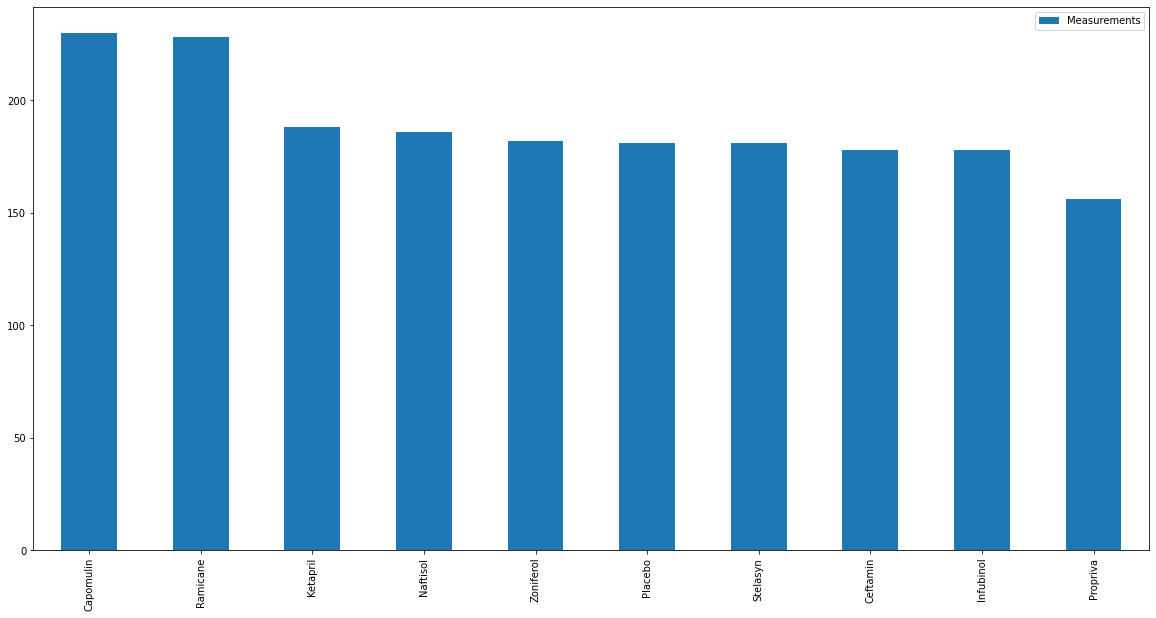

In [194]:
#Measurements per drug using Pandas
drug_list_df.plot(kind="bar", figsize=(20,10))

Text(0, 0.5, 'Total Measurements')

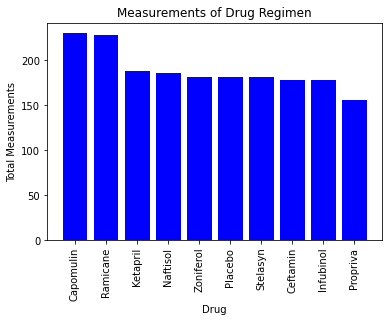

In [178]:
#Measurements per drug using matplotlib
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
meas = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
x_axis = np.arange(len(drugs))
plt.bar(drugs, meas, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')
plt.title("Measurements of Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Total Measurements")

In [185]:
#Male and Female count
mf_count = clean_df["Sex"].value_counts()
mf_count

Male      958
Female    930
Name: Sex, dtype: int64

In [186]:
#Male and Female df
sex_df = pd.DataFrame
mf_array = np.array([[958], [930]])
mf_index_values = ["Male", "Female"]
mf_column_values = ["Number of mice"]
sex_df = pd.DataFrame(data = mf_array,
                                 index = mf_index_values,
                                 columns = mf_column_values)
sex_df

,Number of mice
Male,958
Female,930


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001454CCE7CA0>],
      dtype=object)

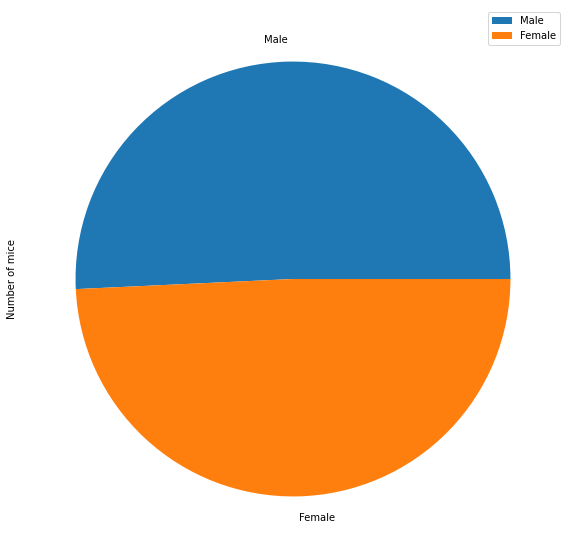

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df.plot(kind="pie", subplots = True, figsize=(20,10))

([<matplotlib.patches.Wedge at 0x1454cc8df10>,
 [Text(-0.749723176393041, -0.9369712689187056, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.43733851956260716, -0.5465665735359115, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

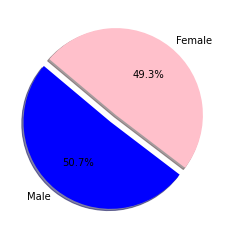

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 930]
colors = ["blue", "pink"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [201]:
#Capomulin max timepoint df
cap_max_df = cap_drug_df.loc[cap_drug_df["Timepoint"] == 45, :]
cap_max_df
clean_cap_max_df = cap_max_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
clean_cap_max_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
104,u364,Capomulin,45,31.023923
124,y793,Capomulin,45,31.896238
134,r554,Capomulin,45,32.377357
144,m957,Capomulin,45,33.329098
164,t565,Capomulin,45,34.455298
204,i738,Capomulin,45,37.311846
224,w914,Capomulin,45,36.041047


In [208]:
# Capomulin Quartiles and IQR
cap_volume = clean_cap_max_df["Tumor Volume (mm3)"]
cap_quartiles = cap_volume.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

#Quartile print statements
print(f"The lower quartile for tumor volume is: {cap_lowerq}")
print(f"The upper quartile for tumor volume is: {cap_upperq}")
print(f"The interquartile range is: {cap_iqr}")
print(f"The median volume is: {cap_quartiles[0.5]} ")

#IQR w/ print statements
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} are possible outliers.")
print(f"Values above {cap_upper_bound} are possible outliers.")

The lower quartile for tumor volume is: 32.37735684
The upper quartile for tumor volume is: 40.1592203
The interquartile range is: 7.781863460000004
The median volume is: 37.31184577 
Values below 20.70456164999999 are possible outliers.
Values above 51.83201549 are possible outliers.


In [202]:
#Ramicane max timepoint df
ram_max_df = ram_drug_df.loc[ram_drug_df["Timepoint"] == 45, :]
ram_max_df
clean_ram_max_df = ram_max_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
clean_ram_max_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
49,g791,Ramicane,45,29.128472
59,s508,Ramicane,45,30.276232
74,m546,Ramicane,45,30.564625
84,z578,Ramicane,45,30.638696
94,j913,Ramicane,45,31.560470
114,n364,Ramicane,45,31.095335
154,c758,Ramicane,45,33.397653
174,a644,Ramicane,45,32.978522
184,i177,Ramicane,45,33.562402


In [209]:
# Ramicane Quartiles and IQR
ram_volume = clean_ram_max_df["Tumor Volume (mm3)"]
ram_quartiles = ram_volume.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

#Quartile print statements
print(f"The lower quartile for tumor volume is: {ram_lowerq}")
print(f"The upper quartile for tumor volume is: {ram_upperq}")
print(f"The interquartile range is: {ram_iqr}")
print(f"The median volume is: {ram_quartiles[0.5]} ")

#IQR w/ print statements
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} are possible outliers.")
print(f"Values above {ram_upper_bound} are possible outliers.")

The lower quartile for tumor volume is: 30.981175224999998
The upper quartile for tumor volume is: 38.508305307499995
The interquartile range is: 7.527130082499998
The median volume is: 34.848627300000004 
Values below 19.690480101250003 are possible outliers.
Values above 49.79900043124999 are possible outliers.


In [203]:
#Infubinol max timepoint df
inf_max_df = inf_drug_df.loc[inf_drug_df["Timepoint"] == 45, :]
inf_max_df
clean_inf_max_df = inf_max_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
clean_inf_max_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
540,a685,Infubinol,45,66.083066
637,c139,Infubinol,45,72.226731
800,e476,Infubinol,45,62.435404
834,f345,Infubinol,45,60.918767
1053,k483,Infubinol,45,66.196912
1813,y163,Infubinol,45,67.685569
1872,z581,Infubinol,45,62.754451


In [210]:
# Infubinol Quartiles and IQR
inf_volume = clean_inf_max_df["Tumor Volume (mm3)"]
inf_quartiles = inf_volume.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

#Quartile print statements
print(f"The lower quartile for tumor volume is: {inf_lowerq}")
print(f"The upper quartile for tumor volume is: {inf_upperq}")
print(f"The interquartile range is: {inf_iqr}")
print(f"The median volume is: {inf_quartiles[0.5]} ")

#IQR w/ print statements
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} are possible outliers.")
print(f"Values above {inf_upper_bound} are possible outliers.")

The lower quartile for tumor volume is: 62.75445141
The upper quartile for tumor volume is: 67.68556862
The interquartile range is: 4.9311172099999965
The median volume is: 66.08306589 
Values below 55.35777559500001 are possible outliers.
Values above 75.08224443499999 are possible outliers.


In [204]:
#Ceftamin max timepoint df
cef_max_df = cef_drug_df.loc[cef_drug_df["Timepoint"] == 45, :]
cef_max_df
clean_cef_max_df = cef_max_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
clean_cef_max_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
493,a275,Ceftamin,45,62.999356
993,j296,Ceftamin,45,61.849023
1033,k210,Ceftamin,45,68.923185
1112,l471,Ceftamin,45,67.748662
1132,l661,Ceftamin,45,59.851956
1162,l733,Ceftamin,45,64.299830
1260,o287,Ceftamin,45,59.741901
1379,p438,Ceftamin,45,61.433892
1670,w151,Ceftamin,45,67.527482
1773,x581,Ceftamin,45,64.634949


In [211]:
# Ceftamin Quartiles and IQR
cef_volume = clean_cef_max_df["Tumor Volume (mm3)"]
cef_quartiles = cef_volume.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

#Quartile print statements
print(f"The lower quartile for tumor volume is: {cef_lowerq}")
print(f"The upper quartile for tumor volume is: {cef_upperq}")
print(f"The interquartile range is: {cef_iqr}")
print(f"The median volume is: {cef_quartiles[0.5]} ")

#IQR w/ print statements
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} are possible outliers.")
print(f"Values above {cef_upper_bound} are possible outliers.")

The lower quartile for tumor volume is: 61.43389223
The upper quartile for tumor volume is: 67.52748237
The interquartile range is: 6.093590140000003
The median volume is: 64.29983003 
Values below 52.29350701999999 are possible outliers.
Values above 76.66786758 are possible outliers.


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

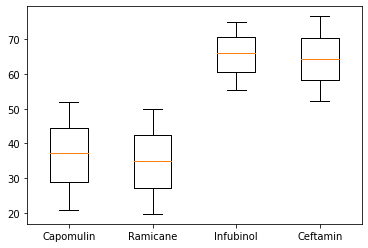

In [213]:
#Box Plots of all 4
box_dict = {'Capomulin': [37.31184577, 20.70456164999999, 51.83201549], 
            'Ramicane' : [34.848627300000004, 19.690480101250003, 49.79900043124999],
            'Infubinol': [66.08306589, 55.35777559500001, 75.08224443499999],
            'Ceftamin': [64.29983003, 52.29350701999999, 76.66786758]}

fig, drug_reg = plt.subplots()
drug_reg.boxplot(box_dict.values())
drug_reg.set_xticklabels(box_dict.keys())

## Line and Scatter Plots

In [215]:
#Starting df w/ mouse s185
cap_mouse_df = cap_drug_df.loc[cap_drug_df["Mouse ID"] == "s185", :]
cap_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


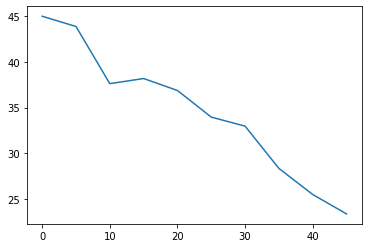

In [223]:
#Basic Capomulin line graph for mouse s185
x_axis_data = np.arange(0,50,5)
x_axis_data
points = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 
          28.328531, 25.472143, 23.343598]
plt.plot(x_axis_data, points)
plt.show()

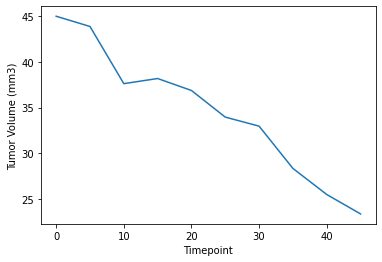

In [225]:
#Graph labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis_data, points)
plt.show()

In [226]:
#Starting df for Capomulin weight vs. volume scatter plot
cap_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [232]:
#Displaying needed columns in a new df
wv_df = cap_drug_df[["Weight (g)", "Tumor Volume (mm3)"]]
wv_df

,Weight (g),Tumor Volume (mm3)
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876
...,...,...
440,24,47.685963
1452,25,45.000000
1453,25,45.597064
1454,25,46.059608


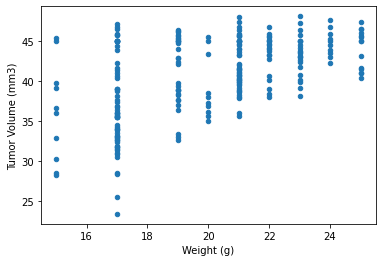

In [273]:
#Scatter plot of weight x volume df
wv_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [274]:
#Same df
wv_df

,Weight (g),Tumor Volume (mm3)
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876
...,...,...
440,24,47.685963
1452,25,45.000000
1453,25,45.597064
1454,25,46.059608


In [285]:
# Calculate the correlation coefficient and linear regression model
m_weight = wv_df.iloc[:,0]
t_volume = wv_df.iloc[:,1]
correlation = st.pearsonr(m_weight,t_volume)
print(f"The correlation between weight and tumor volume for Capomulin is {round(correlation[0],2)}")

The correlation between weight and tumor volume for Capomulin is 0.53


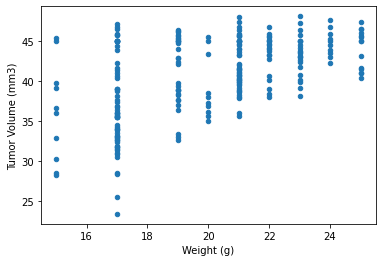

In [286]:
#Scatter plot of weight x volume df
wv_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

In [299]:
#Trouble adding linear regression line, although the scatter plot gives a good summary of regression

#m_x_values = wv_df['Weight (g)']
#m_y_values = wv_df['Tumor Volume (mm3)']
#(slope, intercept, rvalue, pvalue, stderr) = st(m_x_values, m_y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(m_x_values,m_y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(15,30),fontsize=15,color="red")
#plt.xlabel('Weight (g)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.show()